In [1]:
import pandas as pd
import numpy as np

## Task 1
Với dữ liệu đã cho hãy đếm tần suất xuất hiện của từng Product với từng Status tương ứng bằng ```groupby, pivot_table & crosstab```

In [2]:
df = pd.DataFrame({
    'Account':[714466, 714466, 714466, 737550, 146832],
    'Name':['Trantow-Barrows', 'Trantow-Barrows', 'Trantow-Barrows', 'Fritsch, Russel and Anderson', 'Kiehn-Spinka'],
    'Rep':['Craig Booker', 'Craig Booker', 'Craig Booker', 'Craig Booker','Daniel Hinton'],
    'Manager': ['Debra Henley', 'Debra Henley', 'Debra Henley', 'Debra Henley', 'Debra Henley'],
    'Product': ['CPU', 'Software', 'Maintenance', 'CPU', 'CPU'],
    'Quantity': [1, 1, 2, 1,2],
    'Price':[30000, 10000, 5000, 35000, 65000],
    'Status': ['presented', 'presented', 'pending', 'won', 'won']
})

df

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,won
4,146832,Kiehn-Spinka,Daniel Hinton,Debra Henley,CPU,2,65000,won


In [7]:
# Cách 1 : groupby
df.groupby(['Status', 'Product']).size().unstack().fillna(0)# .to_excel(...)

Product,CPU,Maintenance,Software
Status,,,
pending,0.0,1.0,0.0
presented,1.0,0.0,1.0
won,2.0,0.0,0.0


In [8]:
# Cách 2 : dùng cross-tabulation
pd.crosstab(index=df['Status'],
            columns=df['Product'])

Product,CPU,Maintenance,Software
Status,,,
pending,0,1,0
presented,1,0,1
won,2,0,0


In [13]:
# Cách 3 : dùng pivot table
pd.pivot_table(df,
               index=['Status'], 
               columns=['Product'], 
               aggfunc={'Product' : 'count'},
               fill_value=0)

Product                     
Product       CPU Maintenance Software
Status                                
pending         0           1        0
presented       1           0        1
won             2           0        0

## Task 2
Với dữ liệu về bất động sản đã cho được lưu ở file batdongsan.csv hay trả lời các câu hỏi sau:
- số lượng từng loại nhóm đất bán và đất cho thuê cho từng thành phố.
- tính giá trên từng m2 và tạo thêm cột chứa giá trị đó gọi là price/m2 với mỗi dữ liệu nhà hiện có cho nhóm nhà đất bán.
- tính giá trị trung bình của price/m2 của nhóm nhà đất bán cho từng thành phố.
- vẽ biểu đồ so sánh trung bình price/m2 giữa các thành phố.


**Kiến thức**: bài này dùng thêm một vài hàm khá thông dụng
- Series.astype() : convert kiểu dữ liệu cho toàn bộ cột (Series)
- DataFrame.replace(): để thay thế giá trị cũ bằng giá trị mới trong toàn bộ df.
- Series.str.replace() : tương tự replace của str
- ...

**Gợi ý**:
1. Xử lý missing values ở các cột cần thiết cho yêu cầu bài toán
2. Nên xác định nhà đất bán, nhà đất thuê theo cột nào ? Category, root, ...
3. Tính price/m2 kiểu gì ? Sử dụng các cột nào ?
4. Các gợi ý chỉ dừng lại là "gợi ý". Bài toán không có solution chính xác, học viên xem xét và xử lý theo nhận định của mình.

P/s: Để bài toán đơn giản các bạn có thể filter và xoá các bản ghi cảm thấy khó xử lý.

In [ ]:
# Một vài step cần xử lý:
# Lấy dữ liệu chỉ bao gồm nhà bán và nhà thuê
# Convert 'Không xác định' về np.nan để xử lý
# Lấy dữ liệu có cột label_price chỉ thuộc tập (tỷ, triệu) và thuộc loại 'nhà đất bán'
# Convert trường label_price ra số tương ứng với giá trị 'tỷ', 'triệu'
# Làm sạch thông tin ở trường square

In [22]:
# Load dữ liệu, lấy cột đầu làm index và dữ liệu ở cột price là kiểu float
df = pd.read_excel('batdongsan.xlsx', index_col=0, dtype={'price': float})
df.head()

,beds,category,city,direction,district,news_begin_date,news_end_date,news_id,news_type_level,price,root,square,street,ward,label_price
64183,NaN,Nhà đất bán,Kiên Giang,Đông,Phú Quốc,2018-09-10,2018-09-17,17536888.0,Tin thường,NaN,nha_dat_ban,120m²,Dương Tơ,Dương Tơ,NaN
77044,NaN,Nhà đất bán,Đồng Nai,NaN,Nhơn Trạch,2018-09-10,2018-09-17,17288861.0,Tin thường,1.2,nha_dat_ban,262m²,NaN,Vĩnh Thanh,tỷ
2825,3+,Nhà đất bán,Bình Dương,NaN,Bến Cát,2018-09-06,2018-09-13,16667097.0,Tin thường,1.2,nha_dat_ban,67.5m²,NE2,Thới Hòa,tỷ
64420,NaN,Nhà đất bán,Kiên Giang,NaN,Phú Quốc,2018-09-07,2018-09-14,16338832.0,Tin thường,2.9,nha_dat_ban,Không xác định,Bào,Dương Tơ,tỷ
38996,NaN,Nhà đất bán,Hồ Chí Minh,Tây-Nam,Quận 1,2018-09-04,2018-09-11,15120807.0,Tin thường,70.0,nha_dat_ban,225m²,Tôn Đức Thắng,Bến Nghé,tỷ


In [11]:
df['category'].unique()

array(['Nhà đất bán', 'Nhà đất cho thuê', 'Nhà đất cần mua',
       'Nhà đất cần thuê'], dtype=object)

In [12]:
df['root'].unique()

array(['nha_dat_ban', 'nha_dat_thue', 'nha_dat_can_mua',
       'nha_dat_can_thue'], dtype=object)

In [23]:
# thử lọc theo category nhưng nhà đất bán lại có root là nha_dat_ban và nha_dat_thue chứng tỏ thông tin 2 cột không khớp
# -> lấy theo root
df.loc[df['category'] == 'Nhà đất bán', 'root'].unique()

array(['nha_dat_ban', 'nha_dat_thue'], dtype=object)

In [24]:
# Lấy dữ liệu chỉ bao gồm nhà bán và nhà thuê
banthue = df.loc[df['root'].isin(['nha_dat_ban', 'nha_dat_thue'])]
banthue.head()

,beds,category,city,direction,district,news_begin_date,news_end_date,news_id,news_type_level,price,root,square,street,ward,label_price
64183,NaN,Nhà đất bán,Kiên Giang,Đông,Phú Quốc,2018-09-10,2018-09-17,17536888.0,Tin thường,NaN,nha_dat_ban,120m²,Dương Tơ,Dương Tơ,NaN
77044,NaN,Nhà đất bán,Đồng Nai,NaN,Nhơn Trạch,2018-09-10,2018-09-17,17288861.0,Tin thường,1.2,nha_dat_ban,262m²,NaN,Vĩnh Thanh,tỷ
2825,3+,Nhà đất bán,Bình Dương,NaN,Bến Cát,2018-09-06,2018-09-13,16667097.0,Tin thường,1.2,nha_dat_ban,67.5m²,NE2,Thới Hòa,tỷ
64420,NaN,Nhà đất bán,Kiên Giang,NaN,Phú Quốc,2018-09-07,2018-09-14,16338832.0,Tin thường,2.9,nha_dat_ban,Không xác định,Bào,Dương Tơ,tỷ
38996,NaN,Nhà đất bán,Hồ Chí Minh,Tây-Nam,Quận 1,2018-09-04,2018-09-11,15120807.0,Tin thường,70.0,nha_dat_ban,225m²,Tôn Đức Thắng,Bến Nghé,tỷ


In [25]:
# Convert 'Không xác định' về np.nan để xử lý, với cell rỗng pandas mặc định coi là NaN nên không cần xử lý
banthue = banthue.replace('Không xác định', np.nan)
print('Number of Nan value:\n', banthue.isna().sum())
banthue.dropna(inplace=True)

Number of Nan value:
 beds               700
category             0
city                 0
direction          745
district             0
news_begin_date      0
news_end_date        0
news_id              0
news_type_level      0
price               83
root                 0
square              43
street              88
ward                88
label_price         83
dtype: int64


In [26]:
# số lượng từng loại nhóm đất bán và đất cho thuê cho từng thành phố
banthue.groupby(['city', 'root']).size()

city         root        
Bình Dương   nha_dat_ban      1
Hà Nội     nha_dat_ban     21
             nha_dat_thue     9
Hải Phòng    nha_dat_ban      1
             nha_dat_thue     1
Hồ Chí Minh  nha_dat_ban     30
             nha_dat_thue     5
Lào Cai      nha_dat_ban      1
Quảng Nam    nha_dat_ban      1
Đà Nẵng      nha_dat_ban      3
dtype: int64

In [27]:
banthue.head()

,beds,category,city,direction,district,news_begin_date,news_end_date,news_id,news_type_level,price,root,square,street,ward,label_price
56342,2+,Nhà đất bán,Hồ Chí Minh,Đông-Nam,Thủ Đức,2018-09-07,2018-09-14,16435218.0,Tin thường,1.65,nha_dat_ban,48m²,38,Hiệp Bình Chánh,tỷ
88341,4+,Nhà đất cho thuê,Hà Nội,Tây-Nam,Long Biên,2018-09-04,2018-09-11,12879819.0,Tin thường,30.00,nha_dat_thue,150m²,Anh Đào,Việt Hưng,triệu/tháng
51740,4+,Nhà đất bán,Hồ Chí Minh,Bắc,Quận 8,2018-08-28,2018-09-11,17205086.0,Tin Vip 1,2.80,nha_dat_ban,30m²,Bông Sao,5,tỷ
91007,3+,Nhà đất cho thuê,Hà Nội,Đông-Nam,Thanh Xuân,2018-09-03,2018-09-10,17293240.0,Tin thường,17.00,nha_dat_thue,134m²,Nguyễn Trãi,Thượng Đình,triệu/tháng
40914,2+,Nhà đất bán,Hồ Chí Minh,Đông-Bắc,Quận 10,2018-09-04,2018-09-14,17357648.0,Tin Vip đặc biệt,3.30,nha_dat_ban,70m²,Lý Thường Kiệt,14,tỷ


In [28]:
# Lấy dữ liệu có cột label_price chỉ thuộc tập (tỷ, triệu) và thuộc loại 'nhà đất bán'
cond = (banthue['label_price'].isin(['tỷ', 'triệu'])) & (banthue['root'] == 'nha_dat_ban')
datban = banthue.loc[cond]
datban.head()

,beds,category,city,direction,district,news_begin_date,news_end_date,news_id,news_type_level,price,root,square,street,ward,label_price
56342,2+,Nhà đất bán,Hồ Chí Minh,Đông-Nam,Thủ Đức,2018-09-07,2018-09-14,16435218.0,Tin thường,1.65,nha_dat_ban,48m²,38,Hiệp Bình Chánh,tỷ
51740,4+,Nhà đất bán,Hồ Chí Minh,Bắc,Quận 8,2018-08-28,2018-09-11,17205086.0,Tin Vip 1,2.80,nha_dat_ban,30m²,Bông Sao,5,tỷ
40914,2+,Nhà đất bán,Hồ Chí Minh,Đông-Bắc,Quận 10,2018-09-04,2018-09-14,17357648.0,Tin Vip đặc biệt,3.30,nha_dat_ban,70m²,Lý Thường Kiệt,14,tỷ
41628,3+,Nhà đất bán,Hồ Chí Minh,Đông-Nam,Quận 12,2018-09-10,2018-09-17,16167361.0,Tin thường,3.10,nha_dat_ban,60m²,Thạnh Lộc 19,Thạnh Lộc,tỷ
17690,3+,Nhà đất bán,Hà Nội,Tây-Nam,Nam Từ Liêm,2018-09-07,2018-09-14,17213780.0,Tin thường,2.50,nha_dat_ban,35m²,70,Tây Mỗ,tỷ


In [29]:
# Convert trường label_price ra số tương ứng với giá trị 'tỷ', 'triệu'
change = {'tỷ': 10**9, 'triệu': 10**6}
datban['label_price'] = datban['label_price'].replace(change)  # thay thế giá trị của cả series/dataframe

# Làm sạch thông tin ở trường square
datban['square'] = datban['square'].str.replace('m²', '').astype('float')

C:\Users\vietn\AppData\Local\Temp\ipykernel_8908\258246811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datban['label_price'] = datban['label_price'].replace(change)  # thay thế giá trị của cả series/dataframe
C:\Users\vietn\AppData\Local\Temp\ipykernel_8908\258246811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datban['square'] = datban['square'].str.replace('m²', '').astype('float')


In [32]:
datban.head()

,beds,category,city,direction,district,news_begin_date,news_end_date,news_id,news_type_level,price,root,square,street,ward,label_price
56342,2+,Nhà đất bán,Hồ Chí Minh,Đông-Nam,Thủ Đức,2018-09-07,2018-09-14,16435218.0,Tin thường,1.65,nha_dat_ban,48.0,38,Hiệp Bình Chánh,1000000000
51740,4+,Nhà đất bán,Hồ Chí Minh,Bắc,Quận 8,2018-08-28,2018-09-11,17205086.0,Tin Vip 1,2.80,nha_dat_ban,30.0,Bông Sao,5,1000000000
40914,2+,Nhà đất bán,Hồ Chí Minh,Đông-Bắc,Quận 10,2018-09-04,2018-09-14,17357648.0,Tin Vip đặc biệt,3.30,nha_dat_ban,70.0,Lý Thường Kiệt,14,1000000000
41628,3+,Nhà đất bán,Hồ Chí Minh,Đông-Nam,Quận 12,2018-09-10,2018-09-17,16167361.0,Tin thường,3.10,nha_dat_ban,60.0,Thạnh Lộc 19,Thạnh Lộc,1000000000
17690,3+,Nhà đất bán,Hà Nội,Tây-Nam,Nam Từ Liêm,2018-09-07,2018-09-14,17213780.0,Tin thường,2.50,nha_dat_ban,35.0,70,Tây Mỗ,1000000000


In [33]:
# Tính price/m2
datban['price/m2'] = datban['price'] * datban['label_price'] / datban['square']
datban.head()

C:\Users\vietn\AppData\Local\Temp\ipykernel_8908\213496272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datban['price/m2'] = datban['price'] * datban['label_price'] / datban['square']


,beds,category,city,direction,district,news_begin_date,news_end_date,news_id,news_type_level,price,root,square,street,ward,label_price,price/m2
56342,2+,Nhà đất bán,Hồ Chí Minh,Đông-Nam,Thủ Đức,2018-09-07,2018-09-14,16435218.0,Tin thường,1.65,nha_dat_ban,48.0,38,Hiệp Bình Chánh,1000000000,3.437500e+07
51740,4+,Nhà đất bán,Hồ Chí Minh,Bắc,Quận 8,2018-08-28,2018-09-11,17205086.0,Tin Vip 1,2.80,nha_dat_ban,30.0,Bông Sao,5,1000000000,9.333333e+07
40914,2+,Nhà đất bán,Hồ Chí Minh,Đông-Bắc,Quận 10,2018-09-04,2018-09-14,17357648.0,Tin Vip đặc biệt,3.30,nha_dat_ban,70.0,Lý Thường Kiệt,14,1000000000,4.714286e+07
41628,3+,Nhà đất bán,Hồ Chí Minh,Đông-Nam,Quận 12,2018-09-10,2018-09-17,16167361.0,Tin thường,3.10,nha_dat_ban,60.0,Thạnh Lộc 19,Thạnh Lộc,1000000000,5.166667e+07
17690,3+,Nhà đất bán,Hà Nội,Tây-Nam,Nam Từ Liêm,2018-09-07,2018-09-14,17213780.0,Tin thường,2.50,nha_dat_ban,35.0,70,Tây Mỗ,1000000000,7.142857e+07


In [34]:
# Tính giá trị trung bình của price/m2 cho từng thành phố
result = datban.groupby('city')['price/m2'].mean().sort_values(ascending=False).reset_index()

In [35]:
result.columns = ["city", "mean_price/m2"]

In [36]:
result

,city,mean_price/m2
0,Hà Nội,1.617707e+08
1,Hồ Chí Minh,8.011646e+07
2,Hải Phòng,5.223881e+07
3,Đà Nẵng,4.930969e+07
4,Lào Cai,3.609750e+07
5,Bình Dương,3.229167e+07


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vietn\miniconda3\envs\py311-teaching\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vietn\miniconda3\envs\py311-teaching\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vietn\miniconda3\envs\py311-teaching\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


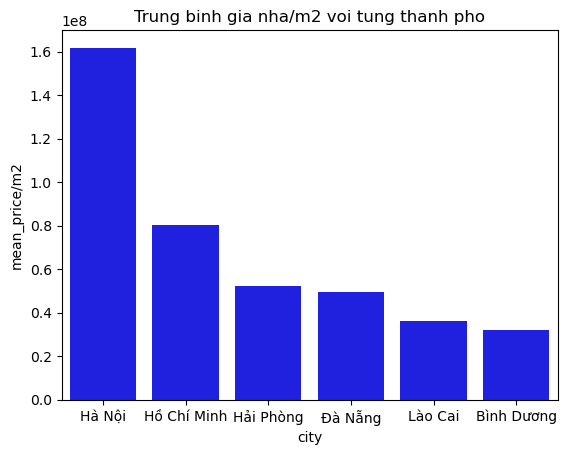

In [38]:
sns.barplot(x="city", y="mean_price/m2", data=result,
            label="Total", color="b")
plt.title("Trung binh gia nha/m2 voi tung thanh pho")
plt.show()

In [ ]:
# END